# EDA on Sympton2Disease

The dataset consists of 1200 datapoints and has two columns: "label" and "text".

1. label : contains the disease labels
2. text : contains the natural language symptom descriptions.

The dataset comprises 24 different diseases, and each disease has 50 symptom descriptions, resulting in a total of 1200 datapoints.

The following 24 diseases have been covered in the dataset:

Psoriasis, Varicose Veins, Typhoid, Chicken pox, Impetigo, Dengue, Fungal infection, Common Cold, Pneumonia, Dimorphic Hemorrhoids, Arthritis, Acne, Bronchial Asthma, Hypertension, Migraine, Cervical spondylosis, Jaundice, Malaria, urinary tract infection, allergy, gastroesophageal reflux disease, drug reaction, peptic ulcer disease, diabetes

In [1]:
import pandas as pd

# Load the dataset (replace 'symptom2disease.csv' with the correct path to your dataset)
df = pd.read_csv('symptom2disease.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Check the unique labels (diseases)
print("Unique diseases:", df['label'].nunique())
print("Disease labels:", df['label'].unique())

# Verify dataset size
print("Total data points:", len(df))


   Unnamed: 0      label                                               text
0           0  Psoriasis  I have been experiencing a skin rash on my arm...
1           1  Psoriasis  My skin has been peeling, especially on my kne...
2           2  Psoriasis  I have been experiencing joint pain in my fing...
3           3  Psoriasis  There is a silver like dusting on my skin, esp...
4           4  Psoriasis  My nails have small dents or pits in them, and...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.3+ KB
None
Number of duplicate rows: 0
Unique diseases: 24
Disease labels: ['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia

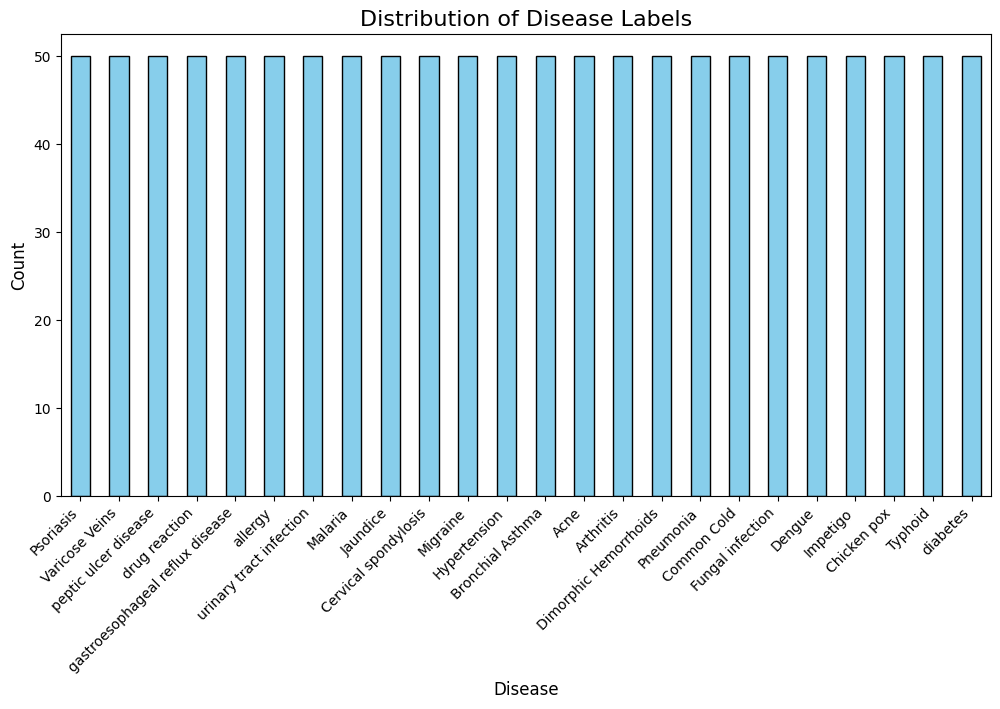

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Disease Labels", fontsize=16)
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


The bar chart confirms that the dataset is balanced, with each disease label having exactly 50 samples. This is excellent for building machine learning models as it prevents biases caused by class imbalance.

Text length (words):
count    1200.000000
mean       30.725000
std         6.707225
min        12.000000
25%        26.000000
50%        30.000000
75%        35.000000
max        55.000000
Name: num_words, dtype: float64

Text length (characters):
count    1200.000000
mean      171.876667
std        35.481506
min        60.000000
25%       147.750000
50%       170.000000
75%       193.000000
max       317.000000
Name: num_chars, dtype: float64


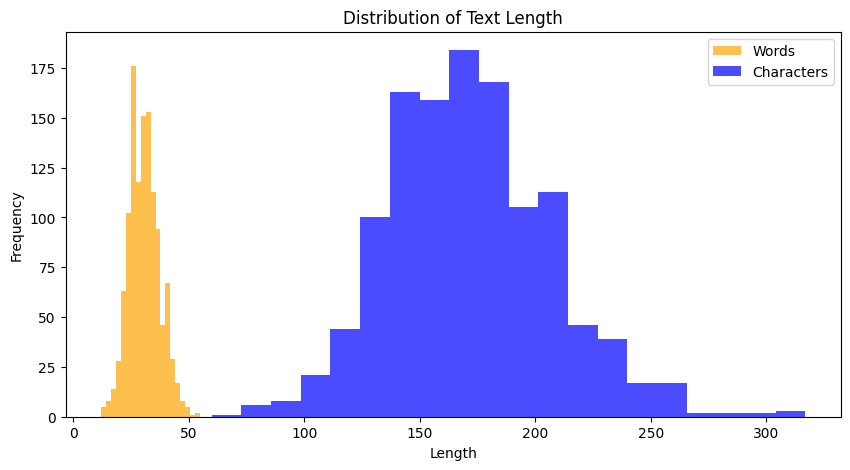

In [3]:
# Calculate the number of words and characters in each text
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_chars'] = df['text'].apply(len)

# Summary statistics
print("Text length (words):")
print(df['num_words'].describe())
print("\nText length (characters):")
print(df['num_chars'].describe())

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(df['num_words'], bins=20, color='orange', alpha=0.7, label='Words')
plt.hist(df['num_chars'], bins=20, color='blue', alpha=0.7, label='Characters')
plt.title("Distribution of Text Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


1. Words (Yellow):

    Most symptom descriptions are relatively short, with a significant peak in the range of 5–20 words.
This suggests that symptom descriptions are concise, which is typical for datasets like this.

2. Characters (Blue):

    The character count distribution is broader, peaking around 100–200 characters.
There are some longer descriptions (200–300+ characters), indicating variability in symptom verbosity.

In [10]:
# Check for extremely short descriptions
short_descriptions = df[df['num_words'] < 5]
print("Short descriptions:\n", short_descriptions)

# Check for extremely long descriptions
long_descriptions = df[df['num_chars'] > 250]
print("Long descriptions:\n", long_descriptions)


Short descriptions:
 Empty DataFrame
Columns: [Unnamed: 0, label, text, num_words, num_chars, label_encoded, clean_text]
Index: []
Long descriptions:
      Unnamed: 0                  label  \
316          16       Fungal infection   
317          17       Fungal infection   
318          18       Fungal infection   
319          19       Fungal infection   
324          24       Fungal infection   
325          25       Fungal infection   
369          69            Common Cold   
370          70            Common Cold   
371          71            Common Cold   
388          88            Common Cold   
496         196  Dimorphic Hemorrhoids   
497         197  Dimorphic Hemorrhoids   
618          18       Bronchial Asthma   
619          19       Bronchial Asthma   
620          20       Bronchial Asthma   
622          22       Bronchial Asthma   
623          23       Bronchial Asthma   
632          32       Bronchial Asthma   
634          34       Bronchial Asthma   
637      

Most common words: [('and', 2598), ('I', 1531), ('my', 1260), ('a', 1253), ('been', 1101), ('have', 1057), ("I've", 669), ('My', 599), ('of', 533), ('to', 514)]


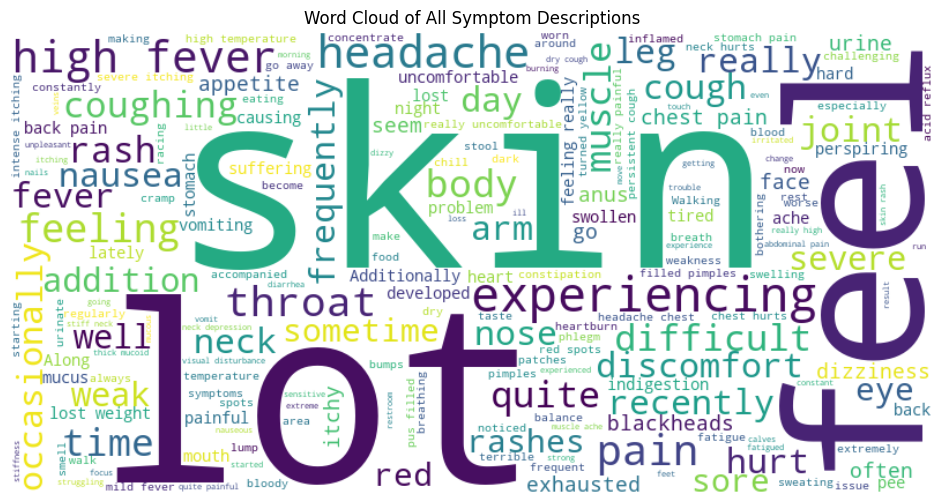

Disease: Psoriasis
Most common words: [('and', 80), ('my', 77), ('is', 56), ('skin', 47), ('I', 45)]

Disease: Varicose Veins
Most common words: [('my', 67), ('I', 66), ('and', 64), ('of', 43), ('is', 39)]

Disease: Typhoid
Most common words: [('and', 97), ('I', 76), ('been', 60), ('a', 60), ('of', 39)]

Disease: Chicken pox
Most common words: [('and', 104), ('I', 78), ('my', 62), ('have', 45), ('a', 40)]

Disease: Impetigo
Most common words: [('and', 86), ('my', 66), ('I', 64), ('a', 50), ('are', 49)]

Disease: Dengue
Most common words: [('and', 104), ('I', 97), ('my', 76), ('have', 71), ('a', 52)]

Disease: Fungal infection
Most common words: [('my', 93), ('and', 88), ('that', 84), ('are', 78), ('a', 72)]

Disease: Common Cold
Most common words: [('and', 178), ('my', 85), ('I', 72), ('a', 66), ('My', 63)]

Disease: Pneumonia
Most common words: [('and', 163), ('a', 90), ("I'm", 78), ('my', 62), ('is', 58)]

Disease: Dimorphic Hemorrhoids
Most common words: [('and', 137), ('been', 125)

In [11]:
from collections import Counter
from wordcloud import WordCloud

# Common words across all descriptions
all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)
print("Most common words:", word_counts.most_common(10))

# Word cloud for all descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Symptom Descriptions")
plt.show()

# Common words per disease
for disease in df['label'].unique():
    disease_words = ' '.join(df[df['label'] == disease]['text']).split()
    print(f"Disease: {disease}")
    print(f"Most common words: {Counter(disease_words).most_common(5)}\n")


## Common Words and Disease-Specific Analysis
Determine whether specific diseases have unique vocabulary.

Most common words: [('and', 2598), ('I', 1531), ('my', 1260), ('a', 1253), ('been', 1101), ('have', 1057), ("I've", 669), ('My', 599), ('of', 533), ('to', 514)]


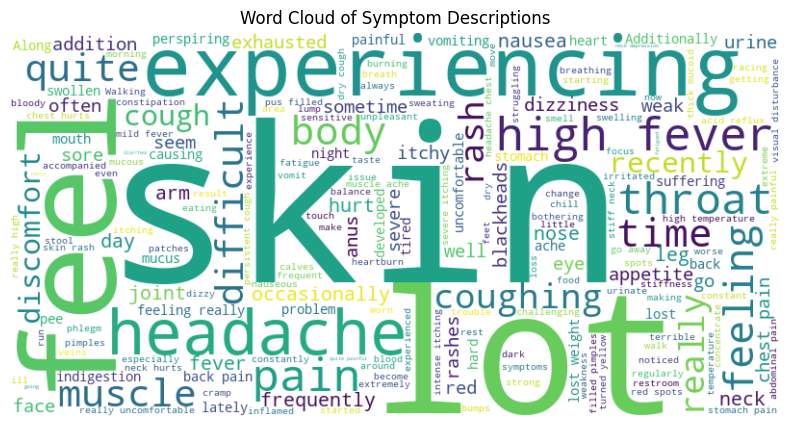

In [4]:
from collections import Counter
from wordcloud import WordCloud

# Tokenize and count common words
all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)

# Most common words
print("Most common words:", word_counts.most_common(10))

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Symptom Descriptions")
plt.show()


In [5]:
# Analyze common words per label
for label in df['label'].unique():
    label_words = ' '.join(df[df['label'] == label]['text']).split()
    label_word_counts = Counter(label_words).most_common(5)
    print(f"Disease: {label}")
    print(f"Most common words: {label_word_counts}\n")


Disease: Psoriasis
Most common words: [('and', 80), ('my', 77), ('is', 56), ('skin', 47), ('I', 45)]

Disease: Varicose Veins
Most common words: [('my', 67), ('I', 66), ('and', 64), ('of', 43), ('is', 39)]

Disease: Typhoid
Most common words: [('and', 97), ('I', 76), ('been', 60), ('a', 60), ('of', 39)]

Disease: Chicken pox
Most common words: [('and', 104), ('I', 78), ('my', 62), ('have', 45), ('a', 40)]

Disease: Impetigo
Most common words: [('and', 86), ('my', 66), ('I', 64), ('a', 50), ('are', 49)]

Disease: Dengue
Most common words: [('and', 104), ('I', 97), ('my', 76), ('have', 71), ('a', 52)]

Disease: Fungal infection
Most common words: [('my', 93), ('and', 88), ('that', 84), ('are', 78), ('a', 72)]

Disease: Common Cold
Most common words: [('and', 178), ('my', 85), ('I', 72), ('a', 66), ('My', 63)]

Disease: Pneumonia
Most common words: [('and', 163), ('a', 90), ("I'm", 78), ('my', 62), ('is', 58)]

Disease: Dimorphic Hemorrhoids
Most common words: [('and', 137), ('been', 125)

### N-gram Analysis

Identifing common bigrams (2-word combinations) and trigrams (3-word combinations) to understand symptom phrase patterns.

Top 10 bigrams:
high fever              130
ve experiencing          92
ve having                77
ve feeling               66
chest pain               57
feeling really           49
perspiring lot           43
ve coughing              43
lost weight              40
really uncomfortable     38
dtype: int64


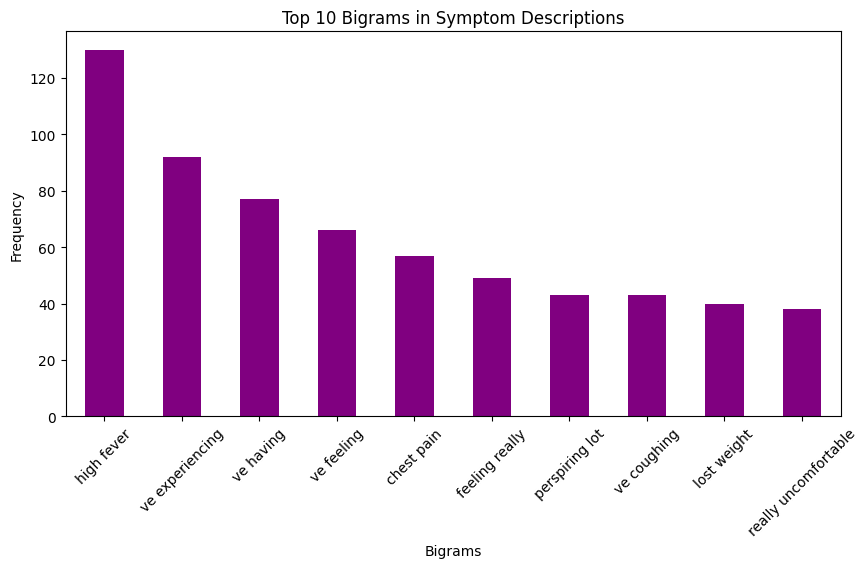

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['text'])
bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

print("Top 10 bigrams:")
print(bigram_counts.head(10))

# Plot top bigrams
bigram_counts.head(10).plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Top 10 Bigrams in Symptom Descriptions")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Observations
1. "High fever" is the most common bigram, occurring 130 times, indicating its prevalence across multiple diseases.

2. Phrases like "ve experiencing", "ve having", and "ve feeling" suggest grammatical artifacts (likely contractions like "I've" or "we've") that may need preprocessing.

3. Other bigrams like "chest pain", "feeling really", and "lost weight" are common symptom-related phrases that could help in disease classification.

4. Some bigrams, such as "perspiring lot" and "really uncomfortable", seem to capture descriptive elements of patient symptoms.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF Matrix Sample:")
print(tfidf_df.head())


TF-IDF Matrix Sample:
   abdomen  abdominal  ability  able  abound  abrupt  absolutely  aburning  \
0      0.0        0.0      0.0   0.0     0.0     0.0         0.0       0.0   
1      0.0        0.0      0.0   0.0     0.0     0.0         0.0       0.0   
2      0.0        0.0      0.0   0.0     0.0     0.0         0.0       0.0   
3      0.0        0.0      0.0   0.0     0.0     0.0         0.0       0.0   
4      0.0        0.0      0.0   0.0     0.0     0.0         0.0       0.0   

   accomapanied  accompanied  ...  worst  wound  wounds    wrists  wrong  \
0           0.0     0.000000  ...    0.0    0.0     0.0  0.000000    0.0   
1           0.0     0.234091  ...    0.0    0.0     0.0  0.000000    0.0   
2           0.0     0.000000  ...    0.0    0.0     0.0  0.382756    0.0   
3           0.0     0.000000  ...    0.0    0.0     0.0  0.000000    0.0   
4           0.0     0.000000  ...    0.0    0.0     0.0  0.000000    0.0   

   yeast  yellow  yellowish  yesterday  zone  
0    

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode labels into numeric format
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Clean text for modeling (lowercase, remove punctuation, etc.)
import re
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
print(df[['label', 'label_encoded', 'clean_text']].head())

# Save processed data
df.to_csv('processed_symptom2disease.csv', index=False)


       label  label_encoded                                         clean_text
0  Psoriasis             15  i have been experiencing a skin rash on my arm...
1  Psoriasis             15  my skin has been peeling especially on my knee...
2  Psoriasis             15  i have been experiencing joint pain in my fing...
3  Psoriasis             15  there is a silver like dusting on my skin espe...
4  Psoriasis             15  my nails have small dents or pits in them and ...


In [14]:
import nltk

# Specify a custom directory to download resources
nltk.data.path.append('C:/nltk_data')

# Download resources again
nltk.download('wordnet', download_dir='C:/nltk_data')
nltk.download('stopwords', download_dir='C:/nltk_data')


[nltk_data] Downloading package wordnet to C:/nltk_data...
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and lowercase
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text']].head())


                                                text  \
0  I have been experiencing a skin rash on my arm...   
1  My skin has been peeling, especially on my kne...   
2  I have been experiencing joint pain in my fing...   
3  There is a silver like dusting on my skin, esp...   
4  My nails have small dents or pits in them, and...   

                                          clean_text  
0  experiencing skin rash arm leg torso past week...  
1  skin peeling especially knee elbow scalp peeli...  
2  experiencing joint pain finger wrist knee pain...  
3  silver like dusting skin especially lower back...  
4  nail small dent pit often feel inflammatory te...  


Top 10 cleaned bigrams:
high fever          130
ive experiencing     92
ive feeling          66
chest pain           57
feel like            54
feeling really       49
perspiring lot       43
ive coughing         43
lost weight          40
rash skin            40
dtype: int64


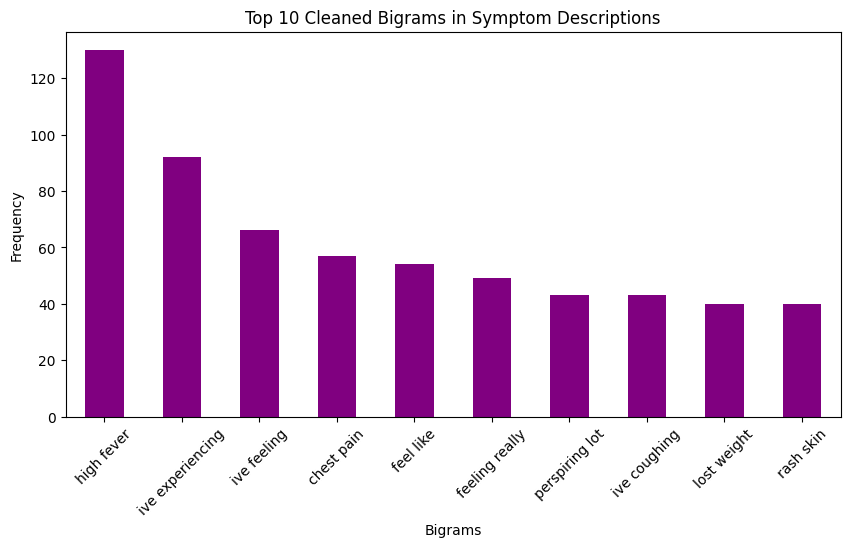

In [17]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cleaned_bigrams = vectorizer.fit_transform(df['clean_text'])
cleaned_bigram_counts = pd.DataFrame(cleaned_bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

print("Top 10 cleaned bigrams:")
print(cleaned_bigram_counts.head(10))

# Plot top cleaned bigrams
cleaned_bigram_counts.head(10).plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Top 10 Cleaned Bigrams in Symptom Descriptions")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [18]:
for disease in df['label'].unique():
    disease_text = df[df['label'] == disease]['clean_text']
    disease_bigrams = vectorizer.fit_transform(disease_text)
    bigram_counts = pd.DataFrame(disease_bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
    print(f"Disease: {disease}")
    print(f"Top 5 bigrams: {bigram_counts.head(5)}\n")


Disease: Psoriasis
Top 5 bigrams: small dent    7
skin rash     7
knee elbow    6
joint pain    6
rash arm      6
dtype: int64

Disease: Varicose Veins
Top 5 bigrams: period time     13
blood vessel    12
causing lot     12
long period     12
vein leg        11
dtype: int64

Disease: Typhoid
Top 5 bigrams: feel like     10
mild fever    10
high fever    10
belly pain     9
ive lot        8
dtype: int64

Disease: Chicken pox
Top 5 bigrams: red spot         18
lost appetite    14
high fever       11
mild fever        9
lymph node        9
dtype: int64

Disease: Impetigo
Top 5 bigrams: near nose     18
high fever    15
rash face     12
red sore      12
sore face     10
dtype: int64

Disease: Dengue
Top 5 bigrams: red spot         13
feel like         9
high fever        9
lost appetite     9
pain eye          9
dtype: int64

Disease: Fungal infection
Top 5 bigrams: rest skin         19
skin different    11
skin ive          10
look like         10
patch skin         9
dtype: int64

Diseas

In [ ]:
for disease in df['label'].unique():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['label'] == disease]['clean_text']))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {disease}", fontsize=16)
    plt.show()


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("Top 20 TF-IDF terms:")
print(tfidf_df.sum().sort_values(ascending=False))


Top 20 TF-IDF terms:
ive             201.479291
skin            170.214958
pain            137.314807
feel            126.373060
lot             126.016111
really          119.728621
fever           100.791282
headache        100.685303
rash            100.267129
im               99.422789
experiencing     95.793561
neck             89.940993
feeling          89.607869
high             85.481423
throat           75.288885
hurt             69.974422
chest            68.944287
cough            66.414574
quite            65.922767
muscle           63.903262
dtype: float64


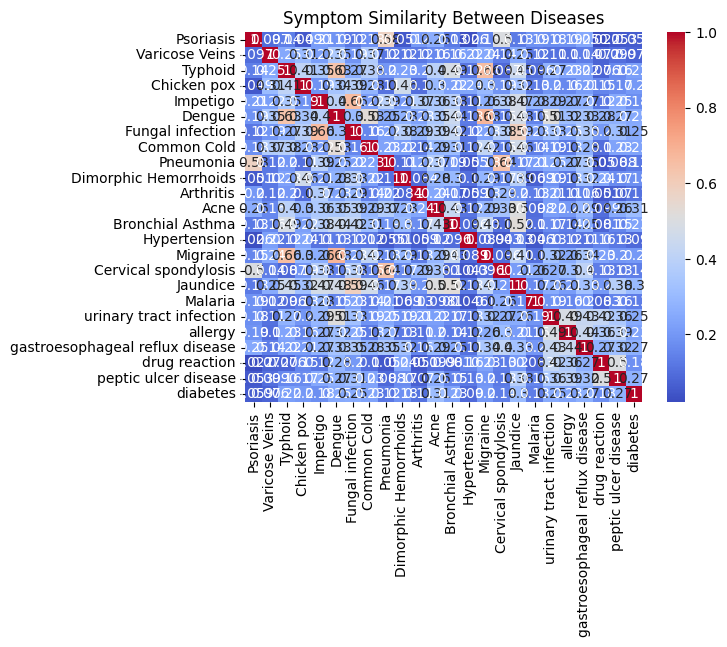

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Create a term-document matrix
vectorizer = CountVectorizer(stop_words='english')
term_matrix = vectorizer.fit_transform(df.groupby('label')['text'].apply(lambda x: ' '.join(x)))

# Compute similarity matrix
similarity_matrix = cosine_similarity(term_matrix)

# Plot heatmap
sns.heatmap(similarity_matrix, xticklabels=df['label'].unique(), yticklabels=df['label'].unique(), cmap="coolwarm", annot=True)
plt.title("Symptom Similarity Between Diseases")
plt.show()


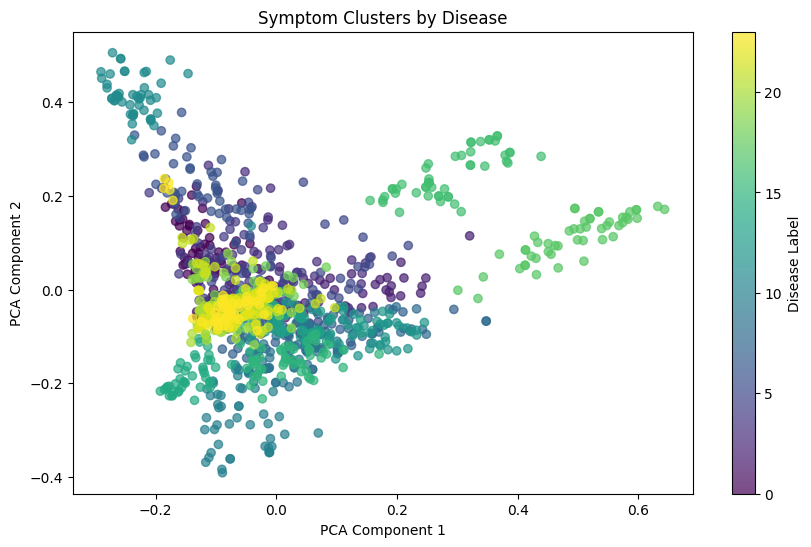

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])

# Dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['label'].factorize()[0], cmap='viridis', alpha=0.7)
plt.title("Symptom Clusters by Disease")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Disease Label")
plt.show()


In [30]:
# Analyze clusters
cluster_dict = {}
for node, cluster_id in partition.items():
    cluster_dict.setdefault(cluster_id, []).append(node)

# Print clusters
for cluster_id, nodes in cluster_dict.items():
    print(f"Cluster {cluster_id}: {nodes[:10]}...")  # Display the first 10 nodes per cluster


Cluster 5: ['humidifiers', 'Psoriasis', 'fingers', 'nails.', 'scales.', 'elbows.', 'peeling.', 'silver', 'caused', 'unpleasant,']...
Cluster 1: ['when', 'joint', 'know', 'There', 'red', 'anything', 'arms.', "don't", 'touch', 'Because']...
Cluster 2: ['have', 'been', 'to', 'body,', 'itching.', 'an', 'become', 'on', 'itchy', 'I']...
Cluster 3: ['addition,', 'itchy,', 'joints.', 'uncomfortable,', 'hurts', 'move', 'experiencing', 'bleeds', 'joints', 'use']...
Cluster 4: ['having', 'even', 'these', 'life', 'irritated', 'These', 'including', 'from', 'painful', 'noticed']...
Cluster 6: ['throbbing,', 'air', 'too.', 'uncomfortable.', 'off.', 'strange', 'burning', 'extreme', 'temperature', 'is']...
Cluster 7: ['this.', 'for', 'difficulty', 'now', 'or', 'general', '.', 'quite', 'number', 'dry']...
Cluster 0: ['like', 'of', 'keep', 'got', 'discomfort.', 'chest', 'trouble', 'back', 'up', 'For']...
Cluster 11: ['other', 'find', 'prone', 'out', 'unpleasant.', 'significant', 'covered', 'face', 'sever

In [31]:
# Identify high-degree nodes in each cluster
for cluster_id, nodes in cluster_dict.items():
    subgraph = G.subgraph(nodes)
    high_degree_nodes = sorted(subgraph.degree(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Cluster {cluster_id} - High-degree nodes: {high_degree_nodes}")


Cluster 5 - High-degree nodes: [('Psoriasis', 133), ('Impetigo', 116), ('sleep.', 2), ('observed', 2), ('at', 2)]
Cluster 1 - High-degree nodes: [('Varicose Veins', 141), ('Dengue', 137), ('Typhoid', 133), ('Chicken pox', 113), ('There', 4)]
Cluster 2 - High-degree nodes: [('Jaundice', 88), ('Malaria', 75), ('I', 2), ('feel', 2), ('have', 2)]
Cluster 3 - High-degree nodes: [('Dimorphic Hemorrhoids', 111), ('Arthritis', 106), ('suffering', 2), ('addition,', 2), ('recently', 2)]
Cluster 4 - High-degree nodes: [('Migraine', 104), ('irritability,', 1), ('blurred', 1), ('Together', 1), ('among', 1)]
Cluster 6 - High-degree nodes: [('Common Cold', 132), ('Pneumonia', 118), ('throat.', 2), ('shake', 2), ('is', 2)]
Cluster 7 - High-degree nodes: [('Bronchial Asthma', 115), ('ongoing', 1), ('difficulties,', 1), ('manage', 1), ('symptoms,', 1)]
Cluster 0 - High-degree nodes: [('Hypertension', 139), ('Cervical spondylosis', 108), ("I've", 2), ('loss', 2), ('balance,', 2)]
Cluster 11 - High-degree

In [32]:
from itertools import combinations

# Compare symptom overlap between clusters
for cluster1, cluster2 in combinations(cluster_dict.keys(), 2):
    shared_nodes = set(cluster_dict[cluster1]) & set(cluster_dict[cluster2])
    print(f"Clusters {cluster1} and {cluster2} share {len(shared_nodes)} nodes: {list(shared_nodes)[:5]}")


Clusters 5 and 1 share 0 nodes: []
Clusters 5 and 2 share 0 nodes: []
Clusters 5 and 3 share 0 nodes: []
Clusters 5 and 4 share 0 nodes: []
Clusters 5 and 6 share 0 nodes: []
Clusters 5 and 7 share 0 nodes: []
Clusters 5 and 0 share 0 nodes: []
Clusters 5 and 11 share 0 nodes: []
Clusters 5 and 13 share 0 nodes: []
Clusters 5 and 8 share 0 nodes: []
Clusters 5 and 9 share 0 nodes: []
Clusters 5 and 10 share 0 nodes: []
Clusters 5 and 12 share 0 nodes: []
Clusters 1 and 2 share 0 nodes: []
Clusters 1 and 3 share 0 nodes: []
Clusters 1 and 4 share 0 nodes: []
Clusters 1 and 6 share 0 nodes: []
Clusters 1 and 7 share 0 nodes: []
Clusters 1 and 0 share 0 nodes: []
Clusters 1 and 11 share 0 nodes: []
Clusters 1 and 13 share 0 nodes: []
Clusters 1 and 8 share 0 nodes: []
Clusters 1 and 9 share 0 nodes: []
Clusters 1 and 10 share 0 nodes: []
Clusters 1 and 12 share 0 nodes: []
Clusters 2 and 3 share 0 nodes: []
Clusters 2 and 4 share 0 nodes: []
Clusters 2 and 6 share 0 nodes: []
Clusters 2 a

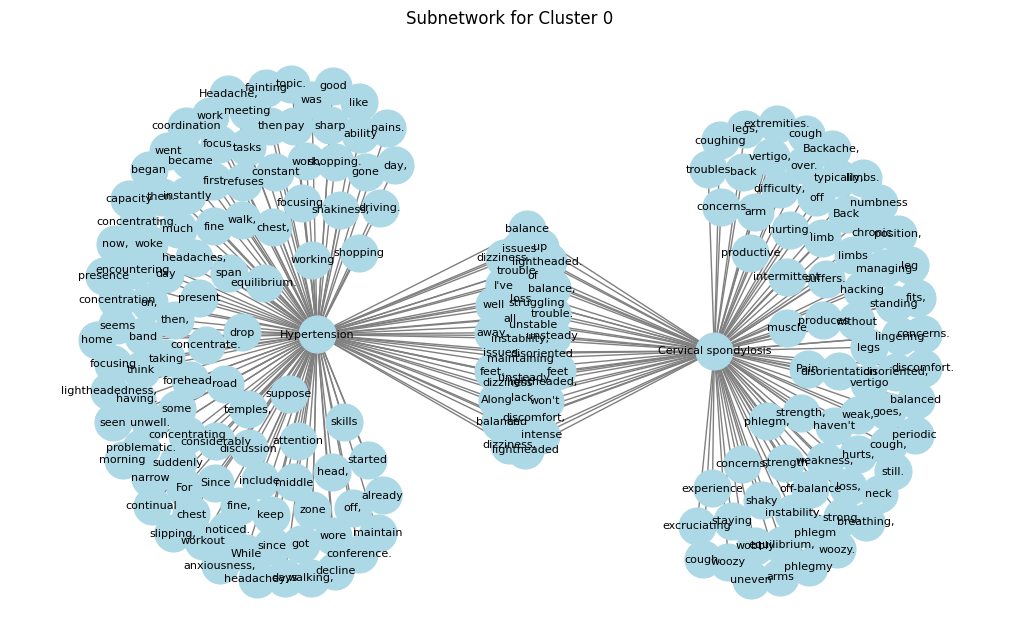

In [33]:
# Create a subgraph for a specific cluster
cluster_id = 0  # Choose a cluster ID
subgraph = G.subgraph(cluster_dict[cluster_id])

# Visualize subgraph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=700, font_size=8, node_color='lightblue', edge_color='gray')
plt.title(f"Subnetwork for Cluster {cluster_id}")
plt.show()


In [34]:
# Get symptoms for each disease in the cluster
cluster_diseases = ["Hypertension", "Cervical spondylosis"]
disease_symptoms = {disease: set(' '.join(df[df['label'] == disease]['text']).split()) for disease in cluster_diseases}

# Calculate overlap
shared_symptoms = disease_symptoms["Hypertension"] & disease_symptoms["Cervical spondylosis"]
print("Shared symptoms:", shared_symptoms)
print("Number of shared symptoms:", len(shared_symptoms))
print("Percentage of shared symptoms:", len(shared_symptoms) / len(disease_symptoms["Hypertension"]) * 100)


Shared symptoms: {'balance.', 'a', 'with', "I've", 'I', 'pain,', 'suffering', 'loss', 'issues', 'dealing', 'instability,', 'struggling', 'problems', 'dizziness', 'also', 'balance,', 'lightheaded.', 'have', 'from', 'feet.', 'unsteady.', 'experienced', 'intense', "won't", 'as', 'my', 'go', 'feeling', 'to', 'feet', 'in', 'that', 'lightheaded,', 'all', 'lack', 'having', 'My', 'been', 'maintaining', 'lot', 'experiencing', 'pain', 'disoriented', 'issues,', 'trouble.', 'on', 'addition', 'up', 'feet,', 'Along', 'unsteady', 'trouble', 'and', 'dizziness.', 'has', 'unstable', 'well', 'Additionally,', 'losing', 'along', 'discomfort,', 'balance', 'difficulty', 'had', 'well.', 'dizzy', 'In', 'lightheaded', 'of', 'away,', 'dizziness,'}
Number of shared symptoms: 71
Percentage of shared symptoms: 30.21276595744681
